# SIRI constructs - dimensionality reduction, clustering, prediction

04.17.2020

In [6]:
#import relevant packages
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import prince

In [7]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    return unique_list

In [28]:
# using dict.get() to get count  
# of each element in string  
def letter_frequency(test_str):
    res = {} 
  
    for keys in test_str: 
        res[keys] = res.get(keys, 0) + 1
    return res

In [30]:
result = letter_frequency('margaret')

In [52]:
result

{'m': 1, 'a': 2, 'r': 2, 'g': 1, 'e': 1, 't': 1}

In [33]:
list(result)

['m', 'a', 'r', 'g', 'e', 't']

In [83]:
constructs = pd.read_csv("SIRI_constructs.csv")

In [84]:
list(constructs)

['Construct',
 'Expressed_NoDeath_Neurons',
 'Expressed_NoDeath_HeLa',
 'DC_soma',
 'DC_neurite',
 'DC_HeLa',
 'Fxn_Neurons',
 'Fxn_HeLa']

In [85]:
constructs

,Construct,Expressed_NoDeath_Neurons,Expressed_NoDeath_HeLa,DC_soma,DC_neurite,DC_HeLa,Fxn_Neurons,Fxn_HeLa
0,UBC-HexCoil_Ala-Linker48-Xpress_GCaMP6f-Linker...,Yes,Yes,103,104,250-1000,Yes,Yes
1,UBC-1M3U-Linker48-cAMPr-gsg-HA-Linker27-2L8HC4_15,Yes,Yes,102,102,NaN,Yes,Yes
2,UBC-3VDX-Linker50-ExRaiAKAR-Linker3-V5-Linker2...,Yes,Yes,102,102,NaN,Yes,Yes
3,UBC-I32_06B-Linker29-ExRaiCKAR-Linker3-OLLAS-L...,Yes,NaN,102,102,NaN,Yes,NaN
4,UBC-1M3U-Linker48-RAB_EKARev-Linker3-VSVg-Link...,Yes,NaN,102,102,NaN,Yes,NaN
...,...,...,...,...,...,...,...,...
61,UBC-NLS_2AN9_mutant1-Linker12-Xpress_GCaMP6f,Yes,Yes,1,1,20-Feb,Yes,NaN
62,UBC-NLS_2AN9_mutant2-Linker12-Xpress_GCaMP6f,Yes,Yes,1,1,20-Feb,Yes,NaN
63,UBC-NLS_2IV1-Linker12-Xpress_GCaMP6f,Yes,Yes,1,1,4.5,Yes,NaN
64,UBC-NLS_1M3U-Linker12-Xpress_GCaMP6f,Yes,Yes,1,1,5-100,Yes,NaN


### Parsing to extract construct features

In [101]:
prom_list = []
fluor_list = []
motif1_list = []
motif2_list = []
motif3_list = []
linker1_list = []
linker2_list = []
linker3_list = []

for idx, row in constructs.iterrows():
    construct = row['Construct']
    nlinkers = construct.count("Linker")
    
    splits = construct.split("Linker")
    nconstructs = construct.count("-")
    
    if nlinkers == 2: #multiple linkers, multiple constructs
        prom = splits[0].split("-")[0].replace(" ","")

        motif1 = splits[0].split("-")[1].replace(" ","")
        #print(motif1)

        linker1 = splits[1].split("-")[0].replace(" ","")

        splits[1].replace(" ","")
        #concatenate the fluorophore name
        fluor = splits[1].split("-")[1].replace(" ","")
        for i in range(2, len(splits[1].split("-")) - 1):
            fluor = fluor + "-" + splits[1].split("-")[i].replace(" ","")

        linker2 = splits[2].split("-")[0].replace(" ","")
        
        motif2 = splits[2].split("-")[1].replace(" ","")
        #print(motif2)
        
        linker3 = "None"
        motif3 = "None"
        
    elif nlinkers == 3: #multiple linkers, multiple constructs
        #print(splits)
        prom = splits[0].split("-")[0].replace(" ","")

        motif1 = splits[0].split("-")[1].replace(" ","")
        #print(motif1)

        linker1 = splits[1].split("-")[0].replace(" ","")

        splits[1].replace(" ","")
        #concatenate the fluorophore name
        fluor = splits[1].split("-")[1].replace(" ","")
        for i in range(2, len(splits[1].split("-")) - 1):
            fluor = fluor + "-" + splits[1].split("-")[i].replace(" ","")

        linker2 = splits[2].split("-")[0].replace(" ","")
        
        motif2 = splits[2].split("-")[1].replace(" ","")
        
        linker2 = splits[3].split("-")[0].replace(" ","")
        
        motif3 = splits[3].split("-")[1].replace(" ","")
        
    elif nlinkers == 1 and nconstructs <= 3: #one linker, one construct
        prom = splits[0].split("-")[0].replace(" ","")
            
        obj1 = splits[0].split("-")[1].replace(" ","") #either fluor or motif
        
        linker1 = splits[1].split("-")[0].replace(" ","")
        
        obj2 = splits[1].split("-")[1].replace(" ","") #either fluor or motif
        
        if "Xpress" in obj1:
            fluor = obj1
            motif1 = obj2
        elif "Xpress" in obj2:
            fluor = obj2
            motif1 = obj1
        else:
            print("Error: fluorophore not found")
        
        linker2 = "None"
        motif2 = "None"
        linker3 = "None"
        motif3= "None"
    else:
        print("Error: case not accounted for!")
        prom = splits[0].split("-")[0].replace(" ","")
        linker1 = "TBD"
        motif1 = "TBD"
        fluor = "TBD"
        linker2 = "TBD"
        motif2 = "TBD"
        linker3 = "TBD"
        motif3= "TBD"
        
    prom_list.append(prom)
    motif1_list.append(motif1)
    motif2_list.append(motif2)
    motif3_list.append(motif3)
    fluor_list.append(fluor)
    linker1_list.append("Linker"+linker1)
    linker2_list.append("Linker"+linker2)
    linker3_list.append("Linker"+linker3)

Error: case not accounted for!
Error: case not accounted for!
Error: case not accounted for!
Error: case not accounted for!


In [104]:
constructs['Promoter'] = prom_list
constructs['Motif1'] = motif1_list
constructs['Motif2'] = motif2_list
constructs['Motif3'] = motif3_list
constructs['Fluor'] = fluor_list
constructs['Linker1'] = linker1_list
constructs['Linker2'] = linker2_list
constructs['Linker3'] = linker3_list

In [105]:
#save to .csv and manually edit
#constructs.to_csv("SIRI_constructs_labeled.csv",index=False)

### With manually-edited constructs, assign features

In [224]:
constructs = pd.read_csv("SIRI_constructs_labeled.csv",index_col='Construct')

In [225]:
constructs

,Expressed_NoDeath_Neurons,Expressed_NoDeath_HeLa,DC_soma,DC_neurite,DC_HeLa,Fxn_Neurons,Fxn_HeLa,Promoter,Motif1,Motif2,...,Motif5,Fluor,Linker1,Linker2,Linker3,Linker4,Linker5,nlinkers,nmotifs,fluor_loc
Construct,,,,,,,,,,,,,,,,,,,,,
UBC-HexCoil_Ala-Linker48-Xpress_GCaMP6f-Linker12-I3_01,Yes,Yes,103,104,250.0,Yes,Yes,UBC,HexCoil_Ala,I3_01,...,None,Xpress_GCaMP6f,Linker48,Linker12,None,None,None,2,2,middle
UBC-1M3U-Linker48-cAMPr-gsg-HA-Linker27-2L8HC4_15,Yes,Yes,102,102,NaN,Yes,Yes,UBC,1M3U,2L8HC4_15,...,None,cAMPr-gsg-HA,Linker48,Linker27,None,None,None,2,2,middle
UBC-3VDX-Linker50-ExRaiAKAR-Linker3-V5-Linker27-5L6HC3_1,Yes,Yes,102,102,NaN,Yes,Yes,UBC,3VDX,V5,...,None,ExRaiAKAR,Linker50,Linker27,None,None,None,2,3,middle
UBC-I32_06B-Linker29-ExRaiCKAR-Linker3-OLLAS-Linker24-I32_06A,Yes,NaN,102,102,NaN,Yes,NaN,UBC,I32_06B,OLLAS,...,None,ExRaiCKAR,Linker29,Linker24,None,None,None,2,3,middle
UBC-1M3U-Linker48-RAB_EKARev-Linker3-VSVg-Linker27-2L8HC4_15,Yes,NaN,102,102,NaN,Yes,NaN,UBC,1M3U,VSVg,...,None,RAB_EKARev,Linker48,Linker27,None,None,None,2,3,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBC-NLS_2AN9_mutant1-Linker12-Xpress_GCaMP6f,Yes,Yes,1,1,20.0,Yes,NaN,UBC,NLS_2AN9_mutant1,None,...,None,Xpress_GCaMP6f,Linker12,None,None,None,None,1,1,end
UBC-NLS_2AN9_mutant2-Linker12-Xpress_GCaMP6f,Yes,Yes,1,1,20.0,Yes,NaN,UBC,NLS_2AN9_mutant2,None,...,None,Xpress_GCaMP6f,Linker12,None,None,None,None,1,1,end
UBC-NLS_2IV1-Linker12-Xpress_GCaMP6f,Yes,Yes,1,1,4.5,Yes,NaN,UBC,NLS_2IV1,None,...,None,Xpress_GCaMP6f,Linker12,None,None,None,None,1,1,end


In [226]:
list(constructs)

['Expressed_NoDeath_Neurons',
 'Expressed_NoDeath_HeLa',
 'DC_soma',
 'DC_neurite',
 'DC_HeLa',
 'Fxn_Neurons',
 'Fxn_HeLa',
 'Promoter',
 'Motif1',
 'Motif2',
 'Motif3',
 'Motif4',
 'Motif5',
 'Fluor',
 'Linker1',
 'Linker2',
 'Linker3',
 'Linker4',
 'Linker5',
 'nlinkers',
 'nmotifs',
 'fluor_loc']

In [228]:
constructs_features = constructs[['Promoter',
 'Motif1',
 'Motif2',
 'Motif3',
 'Motif4',
 'Motif5',
 'Fluor',
 'Linker1',
 'Linker2',
 'Linker3',
 'Linker4',
 'Linker5',
 'nlinkers',
 'nmotifs',
 'fluor_loc']]

In [229]:
constructs_features

,Promoter,Motif1,Motif2,Motif3,Motif4,Motif5,Fluor,Linker1,Linker2,Linker3,Linker4,Linker5,nlinkers,nmotifs,fluor_loc
Construct,,,,,,,,,,,,,,,
UBC-HexCoil_Ala-Linker48-Xpress_GCaMP6f-Linker12-I3_01,UBC,HexCoil_Ala,I3_01,None,None,None,Xpress_GCaMP6f,Linker48,Linker12,None,None,None,2,2,middle
UBC-1M3U-Linker48-cAMPr-gsg-HA-Linker27-2L8HC4_15,UBC,1M3U,2L8HC4_15,None,None,None,cAMPr-gsg-HA,Linker48,Linker27,None,None,None,2,2,middle
UBC-3VDX-Linker50-ExRaiAKAR-Linker3-V5-Linker27-5L6HC3_1,UBC,3VDX,V5,5L6HC3_1,None,None,ExRaiAKAR,Linker50,Linker27,None,None,None,2,3,middle
UBC-I32_06B-Linker29-ExRaiCKAR-Linker3-OLLAS-Linker24-I32_06A,UBC,I32_06B,OLLAS,I32_06A,None,None,ExRaiCKAR,Linker29,Linker24,None,None,None,2,3,middle
UBC-1M3U-Linker48-RAB_EKARev-Linker3-VSVg-Linker27-2L8HC4_15,UBC,1M3U,VSVg,2L8HC4_15,None,None,RAB_EKARev,Linker48,Linker27,None,None,None,2,3,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBC-NLS_2AN9_mutant1-Linker12-Xpress_GCaMP6f,UBC,NLS_2AN9_mutant1,None,None,None,None,Xpress_GCaMP6f,Linker12,None,None,None,None,1,1,end
UBC-NLS_2AN9_mutant2-Linker12-Xpress_GCaMP6f,UBC,NLS_2AN9_mutant2,None,None,None,None,Xpress_GCaMP6f,Linker12,None,None,None,None,1,1,end
UBC-NLS_2IV1-Linker12-Xpress_GCaMP6f,UBC,NLS_2IV1,None,None,None,None,Xpress_GCaMP6f,Linker12,None,None,None,None,1,1,end


In [230]:
famd = prince.FAMD(n_components=5,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)

In [231]:
famd = famd.fit(constructs_features)

In [232]:
famd

FAMD(check_input=True, copy=True, engine='auto', n_components=5, n_iter=3,
     random_state=42)

In [233]:
famd.explained_inertia_

[0.5706282036701051,
 0.08792291318608864,
 0.07849540755994096,
 0.03025152986046053,
 0.02279373610844567]

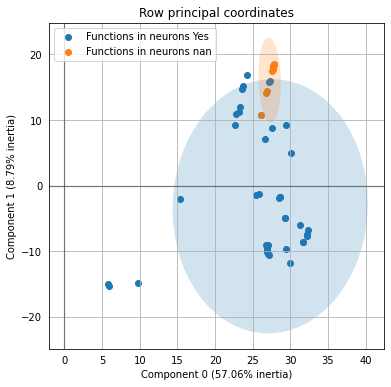

In [234]:
ax = famd.plot_row_coordinates(constructs_features,ax=None,figsize=(6, 6),
                               x_component=0,y_component=1,#labels=constructs_features.index,
                               color_labels=['Functions in neurons {}'.format(t) for t in constructs['Fxn_Neurons']],
                               ellipse_outline=False,
                               ellipse_fill=True,
                               show_points=True)
ax.legend(loc='upper left')

In [235]:
unique(list(constructs['DC_soma']))

[1, 102, 103, 40, 10]

In [236]:
color_labels=['DC at soma {}'.format(t) for t in constructs['DC_soma']]

In [237]:
len(color_labels)

66

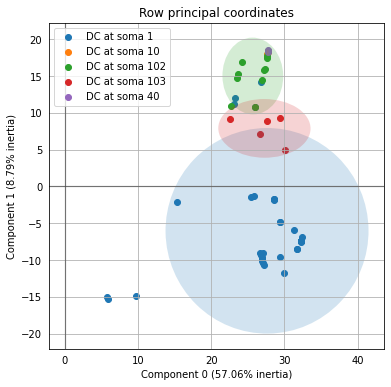

In [238]:
ax = famd.plot_row_coordinates(constructs_features,ax=None,figsize=(6, 6),
                               x_component=0,y_component=1,#labels=constructs_features.index,
                               color_labels=['DC at soma {}'.format(t) for t in constructs['DC_soma']],
                               ellipse_outline=False,
                               ellipse_fill=True,
                               show_points=True)
ax.legend(loc='upper left')

In [239]:
#features post positively correlated with PC 1
famd.column_correlations(constructs_features).nlargest(10, [1], keep='first')

,0,1,2,3,4
fluor_loc_middle,-0.141273,0.945880,0.074381,-0.112970,0.211538
Linker2_Linker27,-0.060325,0.790976,0.070763,-0.325622,-0.244437
Linker1_Linker48,-0.026452,0.697942,0.080190,-0.271228,0.247129
Fluor_cAMPr-HA,0.024511,0.568212,0.056505,-0.321373,-0.114316
Promoter_UBC,0.387710,0.507158,-0.635341,0.338814,-0.195405
Motif2_CC_Pent,-0.018687,0.497623,0.051050,-0.200495,-0.121713
Motif1_O3_33,0.008813,0.345152,0.033005,-0.182905,-0.053165
Linker1_Linker50,-0.096769,0.340197,0.024877,-0.041963,-0.228406
Motif1_3VDX,-0.092511,0.322363,0.029788,-0.058369,-0.168061
Linker5_None,0.803129,0.295641,-0.393726,0.162869,-0.187330


In [240]:
#features most negatively correlated with PC 2
famd.column_correlations(constructs_features).nsmallest(10, [1], keep='first')

,0,1,2,3,4
Fluor_Xpress_GCaMP6f,0.116651,-0.846187,-0.059879,0.169023,0.308663
Linker1_Linker27,-0.324075,-0.537562,0.679815,-0.269997,-0.159353
fluor_loc_beginning,-0.365020,-0.522670,0.721250,0.262550,-0.204943
Promoter_CAG,-0.416257,-0.522540,0.699751,-0.325678,0.064779
Linker2_None,0.583141,-0.511905,-0.801846,-0.148741,-0.201982
Motif2_None,0.583141,-0.511905,-0.801846,-0.148741,-0.201982
fluor_loc_end,0.534234,-0.454894,-0.838054,-0.156278,-0.009068
Linker2_Linker4,-0.485580,-0.443287,0.663389,-0.290840,0.086975
Linker1_Linker12,0.520110,-0.388445,-0.809586,-0.153271,0.194684
Linker3_Linker4,-0.803129,-0.295641,0.393726,-0.162869,0.187330


## Examine individual motifs

In [255]:
motifs = pd.read_csv("SIRI_motifs.csv",index_col='Name')

In [256]:
#list hydrophobic, polar, and charged amino acids
hydrophobic = ['G','A','V','L','I','M','F','W','P']
polar = ['S','T','C','Y','N','Q']
positive = ['K','R','H']
negative = ['D','E']

In [258]:
#add some more features to the motifs and extract their relative success rates
mean_DC = []
success_rate = []
frac_hydrophob = []
frac_hydrophil = []
frac_pos = []
frac_neg = []
num_aas = []

for idx, row in motifs.iterrows():
    seq = row['Sequence']
    letterdict = letter_frequency(seq)
    letters = list(letterdict)
    length = len(seq)
    hp = 0
    pol = 0
    pos = 0
    neg = 0
    for letter in letters:
        ncounts = letterdict[letter]
        if letter in hydrophobic:
            hp = hp + ncounts
        elif letter in polar:
            pol = pol + ncounts
        elif letter in positive:
            pos = pos + ncounts
        elif letter in negative:
            neg = neg + ncounts
    frac_hydrophob.append(hp/length)
    frac_hydrophil.append(pol/length)
    frac_pos.append(pos/length)
    frac_neg.append(neg/length)
    num_aas.append(length)
    
    cons = (constructs[['Motif1','Motif2','Motif3','Motif4','Motif5','Linker1','Linker2','Linker3','Linker4','Linker5']] 
         == idx).replace(False, np.nan).dropna(how='all').index
    cons_list = list(cons)
    
    fn = 0
    fh = 0
    dcs = 0
    dcn = 0
    
    if len(cons) > 0:
        for con in cons_list:
            fxn_neurons = constructs.loc[con]['Fxn_Neurons']
            fxn_hela = constructs.loc[con]['Fxn_HeLa']
            dc_soma = constructs.loc[con]['DC_soma']
            dc_neurite = constructs.loc[con]['DC_neurite']
            
            if fxn_neurons == "Yes":
                fn = fn + 1
            if fxn_hela == "Yes":
                fh = fh + 1
            if dc_soma:
                dcs = dcs + dc_soma
            if dc_neurite:
                dcn = dcn + dc_neurite
    
        #for now just store neuron results
        success_rate.append(fn/len(cons))
        mean_DC.append(np.mean([dcs/len(cons),dcn/len(cons)]))
    else:
        success_rate.append('nan')
        mean_DC.append('nan')

In [259]:
motifs['frac_hydrophob'] = frac_hydrophob
motifs['frac_hydrophil'] = frac_hydrophil
motifs['frac_pos'] = frac_pos
motifs['frac_neg'] = frac_neg
motifs['num_aas'] = num_aas

In [260]:
motif_results = motifs.copy()
motif_results['mean_DC'] = mean_DC
motif_results['success_rate'] = success_rate

In [263]:
motif_results['success_rate']

Name
I3_01                 1
O3_33          0.333333
HexCoil_Ala           1
5H2L_2                1
T3_10                 0
                 ...   
Linker24            0.8
Linker27       0.709677
Linker29       0.333333
Linker48       0.461538
Linker50            0.5
Name: success_rate, Length: 63, dtype: object

In [288]:
rate_cats = []
DC_cats = []

for idx, row in motif_results.iterrows():
    rate = float(row['success_rate'])
    DC = float(row['mean_DC'])
    
    if rate <= (1/3):
        rate_cats.append('low')
    elif 0.33 < rate <= (2/3):
        rate_cats.append('med')
    elif rate > (2/3):
        rate_cats.append('high')
    else:
        rate_cats.append('tbd')
        
    if DC <= 10:
        DC_cats.append('low')
    elif 10 < DC <= 80:
        DC_cats.append('med')
    elif DC > 80:
        DC_cats.append('high')
    else:
        DC_cats.append('tbd')

In [289]:
motif_results['rate_cats'] = rate_cats
motif_results['DC_cats'] = DC_cats

In [290]:
motifs = motifs.fillna(value="TBD")

In [291]:
famd_motifs = prince.FAMD(n_components=10,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
famd_motifs = famd_motifs.fit(motifs)
famd_motifs.explained_inertia_

[0.3931111933769112,
 0.0686506037792697,
 0.06553372659587647,
 0.04288613612393975,
 0.03126591293284487,
 0.023194415657156752,
 0.020129676753471187,
 0.01925576445614989,
 0.014642568576958113,
 0.014454370014246298]

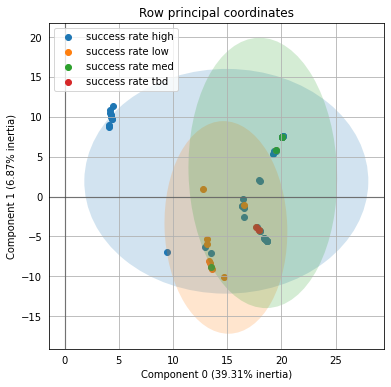

In [292]:
ax = famd_motifs.plot_row_coordinates(motifs,ax=None,figsize=(6, 6),
                               x_component=0,y_component=1,#labels=constructs_features.index,
                               color_labels=['success rate {}'.format(t) for t in motif_results['rate_cats']],
                               ellipse_outline=False,
                               ellipse_fill=True,
                               show_points=True)
ax.legend(loc='upper left')

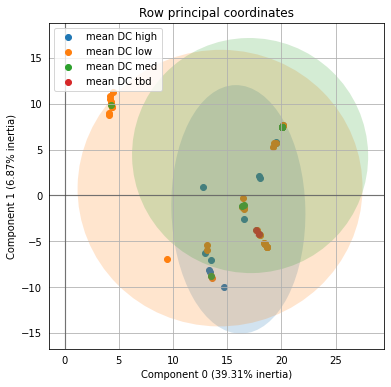

In [293]:
ax = famd_motifs.plot_row_coordinates(motifs,ax=None,figsize=(6, 6),
                               x_component=0,y_component=1,#labels=constructs_features.index,
                               color_labels=['mean DC {}'.format(t) for t in motif_results['DC_cats']],
                               ellipse_outline=False,
                               ellipse_fill=True,
                               show_points=True)
ax.legend(loc='upper left')